# Changelog

## Prior to 12/24/2016

- Copied from the ALife CE Paper notebook
- Updated with new seaborn figures where appropriate (Figures 5, 6, and 7)

## 12/23/2016

- Reorganized with headers and things.
- Added bullets for Stoch Env Figures 8, 9, and 10.
- Generated figure 9, minus the D_p and D_g that is still needed.


## 12/24/2016 

- Slight reorganization, to integrate new 201_CE data rather than old 082 data.

# TODO

- Add D_g and D_p to figures 6 and 7 somehow.

# Init

In [3]:
import collections


## Dataset-specific -- edit me
data_number = "082"
data_name = "Final"

treatments = collections.OrderedDict()
treatments['control'] = 'control'
treatments['noreward'] = 'benign'
treatments['punish'] = 'harsh'

## basic config
#base_path = "/home/rosiec/Dropbox/School_Docs/Papers/ALife\ CE\ Paper/alife2016/evo_mod/"
base_path = "/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/"
raw_data_directory = "raw_data"
analysis_directory = "intermediate_data"
scripts_path = "~/Dropbox/School_Docs/Research/research_scripts/"

## generated
data_directory = data_number + "_" + "_".join(data_name.split(" "))
data_path = base_path + raw_data_directory + "/" + data_directory
analysis_path = base_path + analysis_directory

print (data_path)
print (analysis_path)



/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final
/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data


In [4]:
%cd {data_path}
%mkdir {analysis_path}
%cd {analysis_path}
%pwd


/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final
mkdir: cannot create directory ‘/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data’: File exists
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data


u'/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data'

In [5]:
import glob


import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.20.3'

In [6]:
import sys
sys.path.append({scripts_path})
%run {scripts_path}/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

In [7]:
%pwd

u'/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data'

# Lineage Task Maps - Figure 4

    rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/INTERTWINED/control_intertwined_820001/task_mappings$ python ../../../../../../scripts/analysis/extract_task_mappings.py --lineage_map -a complete_lineage_map.csv -v 5 6 8 ../data/lineage.dat ../data/phenotype/

    rosiec@Loki:/Volumes/rosiec/__research/devolab_research/evolution_of_modularity/raw_data/082/INTERTWINED/control_intertwined_820001/task_mappings$ python ../../../../../../scripts/graph_generation/draw_map_task.py whole_taskmap.png lineage_map__complete_lineage_map.csv__values_only.csv

In [8]:
datafiles = ""
glob = "control_intertwined_82*"
#subdir = "../control_intertwined_820001/"


script = scripts_path + 'analysis/extract_task_mappings.py '
script += '--lineage_map -a control_complete_lineage_map.csv '
script += '5 6 8 ' + subdir + '/data/lineage.dat ' + subdir + '/data/phenotype/ '
print (script)
print
!python2 $script

script = scripts_path + 'graph_generation/draw_map_task.py '
script += '--horizontal '
script += '--xsize 2000 --ysize 525 '
#script += '--legend '
#script += '--ylabel "Genome Sites" '
#script += '--xlabel "Steps from Ancestor" '
script += '--title "Lineage Task-Sites\n\nControl (Static) Environment" '
script += 'control__whole_taskmap.png '
script += "lineage_map__control_complete_lineage_map.csv__values_only.csv " 

print (script)

!python2 $script

ipyImage('control__whole_taskmap.png') 

NameError: name 'subdir' is not defined

~/Dropbox/School_Docs/Research/research_scripts/analysis/extract_task_mappings.py --lineage_map -a control_complete_lineage_map.csv 5 6 8 ../control_intertwined_820001/data/lineage.dat ../control_intertwined_820001/data/phenotype/ 
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/draw_map_task.py --horizontal --xsize 2000 --ysize 750 --legend legend__whole_taskmap.png lineage_map__control_complete_lineage_map.csv__values_only.csv 


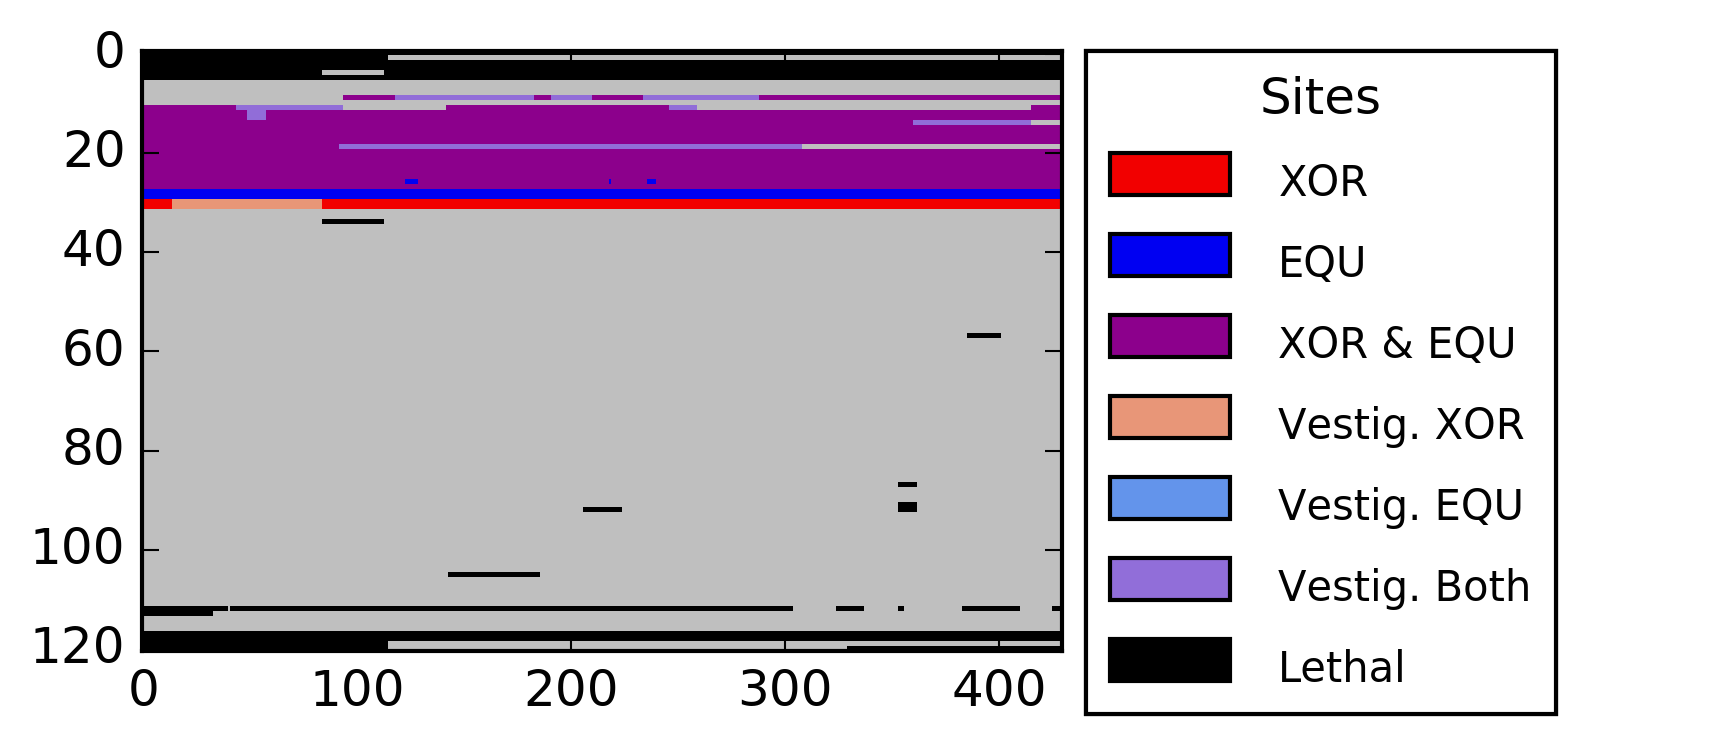

In [7]:
datafiles = ""
subdir = "../control_intertwined_820001"

script = scripts_path + 'analysis/extract_task_mappings.py '
script += '--lineage_map -a control_complete_lineage_map.csv '
script += '5 6 8 ' + subdir + '/data/lineage.dat ' + subdir + '/data/phenotype/ '
print (script)
print
!python2 $script

script = scripts_path + 'graph_generation/draw_map_task.py '
script += '--horizontal '
script += '--xsize 2000 --ysize 750 '
script += '--legend '
#script += '--ylabel "Genome Sites" '
#script += '--xlabel "Steps from Ancestor" '
#script += '--title "Lineage Task-Sites\n\nControl (Static) Environment" '
script += 'legend__whole_taskmap.png '
script += "lineage_map__control_complete_lineage_map.csv__values_only.csv " 

print (script)

!python2 $script

ipyImage('legend__whole_taskmap.png') 

~/Dropbox/School_Docs/Research/research_scripts/analysis/extract_task_mappings.py --lineage_map -a noreward_complete_lineage_map.csv 5 6 8 ../noreward_intertwined_820001/data/lineage.dat ../noreward_intertwined_820001/data/phenotype/ 
~/Dropbox/School_Docs/Research/research_scripts/graph_generation/draw_map_task.py --horizontal --xsize 2000 --ysize 525 --ylabel "Genome Locus
(Instruction Site)" --title "Benign Environment" benign__whole_taskmap.png lineage_map__noreward_complete_lineage_map.csv__values_only.csv 


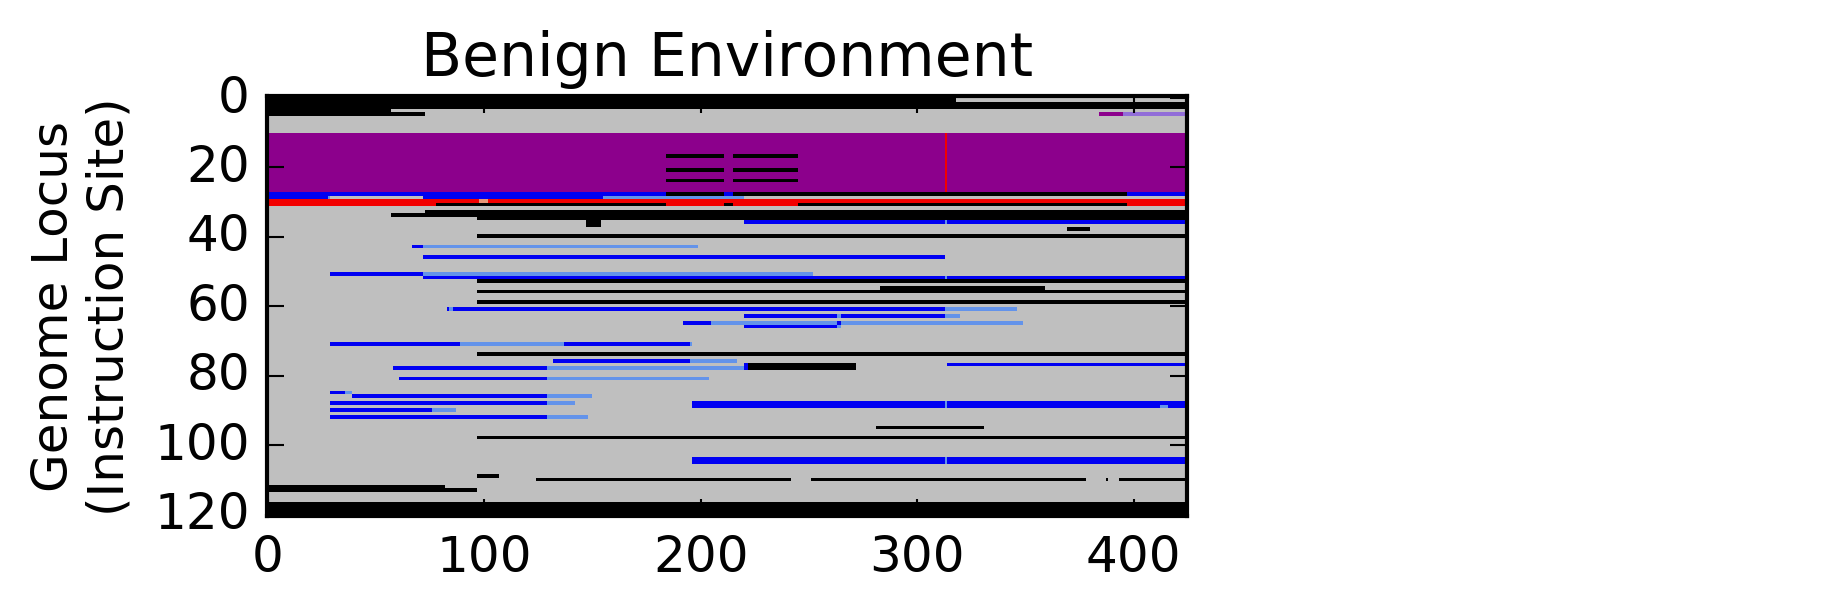

In [10]:
datafiles = ""
subdir = "../noreward_intertwined_820001"

script = scripts_path + 'analysis/extract_task_mappings.py '
script += '--lineage_map -a noreward_complete_lineage_map.csv '
script += '5 6 8 ' + subdir + '/data/lineage.dat ' + subdir + '/data/phenotype/ '
print (script)
print
!python2 $script

script = scripts_path + 'graph_generation/draw_map_task.py '
script += '--horizontal '
script += '--xsize 2000 --ysize 525 '
script += '--ylabel "Genome Locus\n(Instruction Site)" '
#script += '--xlabel "Steps from Ancestor" '
script += '--title "Benign Environment" '
script += 'benign__whole_taskmap.png '
script += "lineage_map__noreward_complete_lineage_map.csv__values_only.csv " 

print (script)

!python2 $script

ipyImage('benign__whole_taskmap.png') 

In [21]:
%pwd
#print data_path

u'/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/intermediate_data'

In [22]:
print data_path

/home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/raw_data/082_Final


~/Dropbox/School_Docs/Research/research_scripts/analysis/extract_task_mappings.py --lineage_map -a punish_complete_lineage_map.csv 5 6 8 /home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/raw_data/082_Final/punish_intertwined_820001/data/lineage.dat /home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/raw_data/082_Final/punish_intertwined_820001/data/phenotype/ 

/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/intermediate_data
202_SCE_MutLand_1Step__filtered.pd.pickle
203_CCE_MutLand_1Step.pd.pickle
204_SCE_MutLand_2Step.pd.pickle
205_CCE_MutLand_2Step.pd.pickle
benign__entropy.png
c_i_1step_mutation_landscape_metrics.csv
c_i_2nd_step_mutation_landscape_metrics.csv
coalescences.csv
control_coalescences.csv
control__entropy.png
control_intertwined__vestigial_timeseries.csv
func_and_vestigial_sites
harsh__entropy.png
lineage_map__punish_complete_lineage_map.csv__values_only.csv
n_i_1step_mutation_landscape_metrics.csv

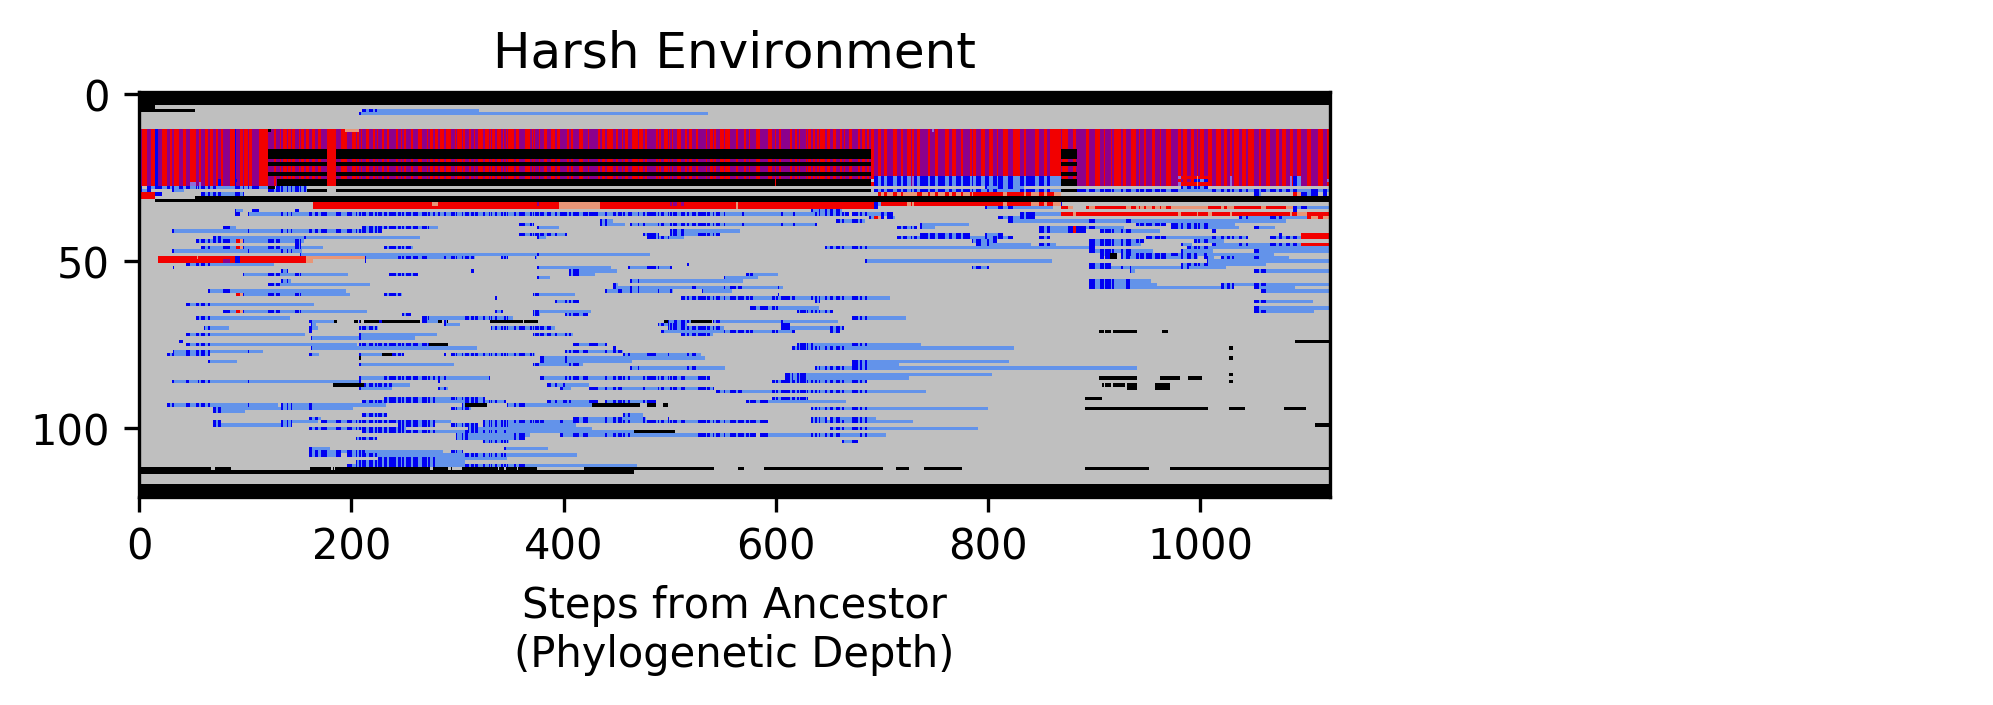

In [28]:
datafiles = ""
subdir = "punish_intertwined_820001"

script = scripts_path + 'analysis/extract_task_mappings.py '
script += '--lineage_map -a punish_complete_lineage_map.csv '
script += '5 6 8 ' + data_path + "/" + subdir + '/data/lineage.dat ' + data_path + "/" + subdir + '/data/phenotype/ '
print (script)
print
!python2 $script

# !pwd
# !ls

script = scripts_path + 'graph_generation/draw_map_task.py '
script += '--horizontal '
script += '--xsize 2350 --ysize 525 '
#script += '--ylabel "Genome Sites" '
script += '--xlabel "Steps from Ancestor\n(Phylogenetic Depth)" '
script += '--title "Harsh Environment" '
script += 'harsh__whole_taskmap.png '
script += "lineage_map__punish_complete_lineage_map.csv__values_only.csv " 

print (script)

!python2 $script

ipyImage('harsh__whole_taskmap.png') 

# Do it here

In [9]:
def get_data(treatment_name):
    datafiles = ""
    subdir = treatment_name + "_intertwined_820001"
    subdir = data_path + "/" + subdir 

    script = scripts_path + 'analysis/extract_task_mappings.py '
    script += '--lineage_map -a ' + treatment_name + '_complete_lineage_map.csv '
    script += '5 6 8 ' + subdir + '/data/lineage.dat ' + subdir + '/data/phenotype/ '

    print (script)
    print
    !python2 $script
    lineage_map_file = "lineage_map__" + treatment_name + "_complete_lineage_map.csv__values_only.csv"

#     !pwd
#     !ls
    
    ######### load in the lineage file
    maps = []
    if lineage_map_file[-3:] == ".gz":
        fp = gzip.open(lineage_map_file)
    else:
        fp = open(lineage_map_file)

    for line in fp:
        line = line.strip()
        if len(line) == 0 or line[0] == '#': ## skip it if it's not format
            continue

        line = line.split(',')
        line = [ int(val) for val in line ]
        maps.append( line )

    fp.close()
    
    return maps

#benign__whole_taskmap

d = get_data("noreward")

#print d

~/Dropbox/School_Docs/Research/research_scripts/analysis/extract_task_mappings.py --lineage_map -a noreward_complete_lineage_map.csv 5 6 8 /home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/noreward_intertwined_820001/data/lineage.dat /home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/noreward_intertwined_820001/data/phenotype/ 



~/Dropbox/School_Docs/Research/research_scripts/analysis/extract_task_mappings.py --lineage_map -a control_complete_lineage_map.csv 5 6 8 /home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/control_intertwined_820001/data/lineage.dat /home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/control_intertwined_820001/data/phenotype/ 

/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data
~/Dropbox/School_Docs/Research/research_scripts/analysis/extract_task_mappings.py --lineage_map -a noreward_complete_lineage_map.csv 5 6 8 /home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/noreward_intertwined_820001/data/lineage.dat /home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/noreward_intertwined_820001/data/phenotype/ 

/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_

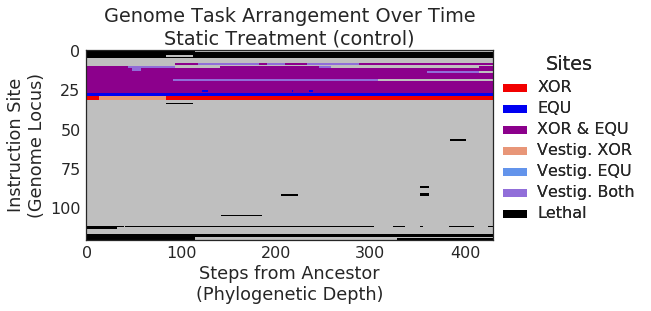

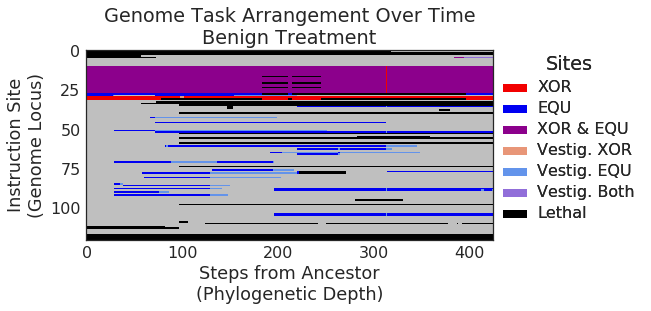

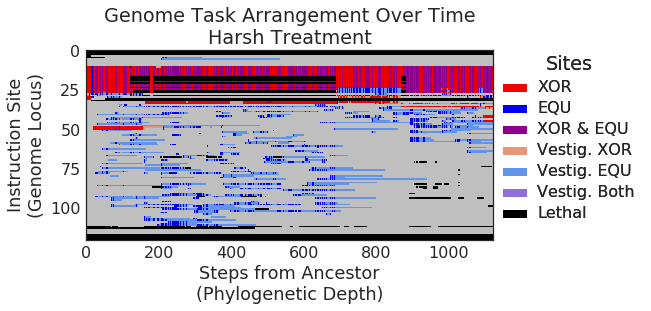

In [11]:
def do_fig(treatment, name):
    import matplotlib.cm as cm
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    maps = get_data(treatment)

    class Colors:
        Black = (0.0, 0.0, 0.0, 1.0)
        Purple = (0.55, 0.0, 0.55, 1.0)
        Blue = (0, 0, 0.95, 1.0)
        Green = (0.0, 0.7, 0.0, 1.0)
        Yellow = (0.9, 0.9, 0.0, 1.0)
        Orange = (0.93, 0.67, 0.13, 1.0)
        Red = (0.95, 0, 0.0, 1.0)
        DarkPink = (0.86, 0.62, 0.65, 1.0)
        DarkGray = (0.65, 0.65, 0.65, 1.0)
        Gray = (0.75, 0.75, 0.75, 1.0)
        LightGray = (0.85, 0.85, 0.85, 1.0)
        White = (1.0, 1.0, 1.0, 1.0)
        LightPurple = (0.57, 0.43, 0.85, 1.0) ## degenerate site
        LightBlue = (0.39, 0.58, 0.92, 1.0) ## degenerate site
        LightPink = (0.91, 0.59, 0.47, 1.0) ## degenerate site
        TransparentGray = (0.75, 0.75, 0.75, 0.5)
        Default = (0.7, 0.53, 0.5, 1.0) ## pukey brown

    #### <-- See extract_task_mappings.py for the actual meanings.
    ColorsMapping = [
        Colors.Default, ## this is unused -- an error code
        Colors.Gray, ## KO.GainBB_GainFL -- neutral
        Colors.Gray, ## KO.GainBB_NeutFL -- neutral
        Colors.Blue, #Colors.Green, ## fluctuating site, but you also gain BB, so a little different
        Colors.Gray, ## KO.NeutBB_GainFL -- neutral
        Colors.Gray, ## KO.NeutBB_NeutFL -- neutral
        Colors.Blue, ## fluctuating only site
        Colors.Red,  #Colors.Orange, ## backbone site, but you gain FL, so interesting
        Colors.Red,  ## backbone only site
        Colors.Purple, ## both site
        Colors.Black,  ## knocking out this site kills you -- KnockOuts.Dead
        Colors.LightGray, ## empty -- KnockOuts.Empty -- WEIRD -- 11
        Colors.LightBlue, ## degenerate fluctuating site -- KODegen.FLNeut
        Colors.LightPink, ## degenerate backbone site -- KODegen.BBNeut
        Colors.LightPurple, ## degenerate both site -- KODegen.BBFLNeut
        Colors.Yellow, ## Point Mutation -- 15
        Colors.Green, ## Insertion -- 16
        Colors.Orange, ## Deletion -- 17
        Colors.DarkPink, #Colors.TransparentGray,## No Mutation -- 18
        Colors.White, ## Phases.Reward -- 19
        Colors.Red, ## Phases.NoReward
        Colors.Black] ## Phases.Border -- 21


    ## apply the colors
    colored_maps = []
    for input_map in maps:
        colored_map = []
        for site in input_map:
            colored_map.append( ColorsMapping[ site ] )
        colored_maps.append( colored_map )

    ## rotate
    horizontal_maps = []    
    for x in range(len(colored_maps[0])):
        horizontal_maps.append([])
        for y in range(len(colored_maps)):
            horizontal_maps[x].append(colored_maps[y][x])

    colored_maps = horizontal_maps            

    ######### NOW GENERATE THE PLOT(S) ###############
    def proxy_artist( color ):
        p = plt.Rectangle((0,0), 1,1, fc=color)
        return p
    
    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=2)
    sns.set_style("white")

    fig = plt.figure(figsize=(10, 3.5)) 
    ax = fig.add_subplot(111)

    ax.imshow(colored_maps, 
              interpolation='nearest', 
              aspect="auto")#, aspect=1) ## now it should spread wide.

    divider = make_axes_locatable( ax )


    ax_leg = divider.append_axes("right", 2, pad=0.1 )
    ax_leg.set_frame_on(False)
    ax_leg.axes.get_yaxis().set_visible(False)
    ax_leg.axes.get_xaxis().set_visible(False)


    ## prepare the proxy artists for the legends
    sites = [ proxy_artist(Colors.Red),
              proxy_artist(Colors.Blue),
              proxy_artist(Colors.Purple),
              proxy_artist(Colors.LightPink),
              proxy_artist(Colors.LightBlue),
              proxy_artist(Colors.LightPurple),
              proxy_artist(Colors.Black)]
    phases = [proxy_artist(Colors.Gray),
              proxy_artist(Colors.DarkGray)]

    mutations = [proxy_artist(Colors.Yellow),
                 proxy_artist(Colors.Green),
                 proxy_artist(Colors.Orange)]

    sites_labels = [ 'XOR', 'EQU', 'XOR & EQU',
                     'Vestig. XOR', 'Vestig. EQU', 'Vestig. Both', 'Lethal' ]
    phases_labels = ['Reward Phase', 'No Reward Phase' ]
    mutations_labels = ['Point Mutation', 'Insertion', 'Deletion' ]

    l1 = ax_leg.legend(sites, sites_labels, 
                       title="Sites", bbox_to_anchor=(-0.01, 1), loc=2, borderaxespad=0.0, fontsize=12)

    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp( ltext, fontsize='small')



    plt.gca().add_artist(l1)

    ax.set_ylabel("Instruction Site\n(Genome Locus)")
    ax.set_xlabel("Steps from Ancestor\n(Phylogenetic Depth)")

    ax.set_title("Genome Task Arrangement Over Time\n" + name)
    #plt.suptitle("Genome Task Arrangement Over Time")
    
    !pwd
    plt.savefig(treatment + "__whole_taskmap.png", dpi=300, bbox_inches='tight')


do_fig('control', 'Static Treatment (control)')
do_fig('noreward', 'Benign Treatment')
do_fig('punish', 'Harsh Treatment')